In [33]:
import numpy as np
import matplotlib.pyplot as plt
import corner
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ale/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<ErrorbarContainer object of 3 artists>

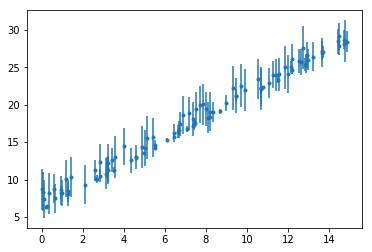

In [2]:
x_dat,y_dat,err_dat=np.loadtxt('datos.txt',unpack=True).T
plt.errorbar(x_dat, y_dat, err_dat, fmt='.')

In [ ]:
#valores reales

a_real=1.5
b_real=6.

In [3]:
Nsamples=10000

Nwalkers=10

#Valores iniciales

a_inf=0.
a_sup=3.
b_inf=0.
b_sup=10.
a_st=np.zeros(Nwalkers)
b_st=np.zeros(Nwalkers)
sig_a=0.09
sig_b=0.09

In [4]:
#punto de inicio de los walkers

a_medio=(a_sup-a_inf)/2
b_medio=(b_sup-b_inf)/2
a_st.fill(a_medio)
b_st.fill(b_medio)

In [44]:
# Función a ajustar
def f(x,a,b):
    return a*x+b

# Definimos el ln de los prior
def lnprior(a,b):
    if ((a_inf<a<a_sup) and (b_inf<b<b_sup)):
        return 0.
    else:
        return -np.infty
    return


#Definimos el Likelihood
def lnlike(a,b):
    suma=0.0
    evalu=f(x_dat,a,b)
    for i in range (0,len(x_dat)):
        suma+=-0.5*(((evalu[i]-y_dat[i])/err_dat[i]**2)**2)
    return suma

#Definimos la cadena de Markov
def MCMC(a_ini,b_ini,a_prueba, b_prueba):
    p_ini=lnlike(a_ini,b_ini)
    p_prueba=lnlike(a_prueba, b_prueba)
    frac=np.exp(p_prueba)/np.exp(p_ini) #esto porque hasta antes estabamos trabajando con el ln del likelihood, entonces la fracción de p_nuevo/p_ini, será la exponencial de la diferencia
    if (p_prueba>p_ini):
        return a_prueba, b_prueba
    else:
        ran=np.random.uniform()
        if (frac>ran):
            return a_prueba, b_prueba
        else:
            return a_ini,b_ini
    return
  

In [45]:
def walker(a_st,b_st,sig_a,sig_b):
    chains=[]
    probs=[]
    for i in range(Nsamples):
        a_st=np.random.normal(a_st,sig_a)
        b_st=np.random.normal(b_st,sig_b)
    
        if (lnprior(a_st, b_st)==-np.infty):
            a_st=a_st
            b_st=b_st
        else:
    
            a_prueba=np.random.normal(a_st,sig_a)
            b_prueba=np.random.normal(b_st,sig_b)
            a_nuevo,b_nuevo=MCMC(a_st,b_st,a_prueba, b_prueba)
            a_st=a_nuevo
            b_st=b_nuevo
     
        prob=lnlike(a_st,b_st)
        chains.append((a_st,b_st))       
        probs.append(prob)

    a = [a_st for a_st,b_st in chains]
    b = [b_st for a_st,b_st in chains]
    besti = np.argmax(probs)
    a_mejor = a[besti]
    b_mejor = b[besti]
    return a,b,probs,a_mejor,b_mejor

In [48]:
sampler=np.zeros((Nwalkers,Nsamples,2))
probabilidades=np.zeros((Nwalkers,Nsamples))
a_mejor=np.zeros(Nwalkers)
b_mejor=np.zeros(Nwalkers)

for i in range(Nwalkers):
    sampler[i,:,0],sampler[i,:,1],probabilidades[i,:], a_mejor[i],b_mejor[i]=walker(a_st[i],b_st[i],sig_a,sig_b)



/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


In [30]:
sampler[1,:,0]

array([1.63459147, 1.53211743, 1.55446068, ..., 1.77156273, 1.85907319,
       1.87595283])

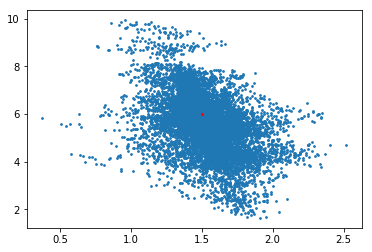

In [31]:
plt.scatter(sampler[1,:,0], sampler[1,:,1], s=3)
plt.scatter(a_mejor[1],b_mejor[1],color='r',s=3)

In [50]:
sampler_=sampler[:,:,:].reshape(Nwalkers*Nsamples,2)

array([[1.47002266, 5.18739044],
       [1.52838667, 5.24894909],
       [1.49962987, 5.20548413],
       ...,
       [1.56470289, 6.80406225],
       [1.51900978, 6.69789699],
       [1.38614344, 6.73303071]])

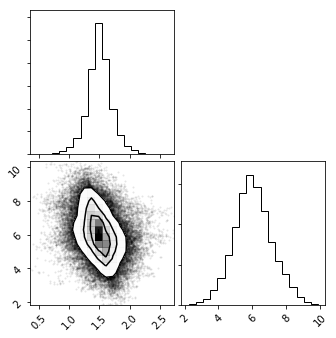

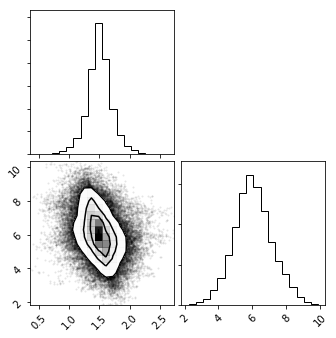

In [51]:
corner.corner(sampler_)

In [69]:
#Promedio para cada caminador y promedio de este promedio

theta_a_m=np.zeros(Nwalkers)
theta_b_m=np.zeros(Nwalkers)
for i in range(Nwalkers):
    theta_a_m[i]=np.mean(sampler[i,:,0])
    theta_b_m[i]=np.mean(sampler[i,:,1])
    
theta_a=np.mean(theta_a_m)
theta_b=np.mean(theta_b_m)

#Promedio total de a
print(theta_a)

#Promedio total de b
print(theta_b)

1.5555956356938343
5.770177812720798


In [70]:
#varianza entre cadenas

B_a=0.0
B_b=0.
for i in range(Nwalkers):
    B_a+=(Nsamples/(Nwalkers-1))*(theta_a_m[i]-theta_a)**2
    B_b+=(Nsamples/(Nwalkers-1))*(theta_b_m[i]-theta_b)**2

print(B_a)

print(B_b)

929.2260181370732
15378.811904802327


In [85]:
B_a=0.
B_b=0.
theta_a_m=np.zeros(Nwalkers)
theta_b_m=np.zeros(Nwalkers)
theta_a=0.
theta_b=0.

for i in range(Nwalkers):
    for j in range(Nsamples):
        
        theta_a_m[i]+=(1/Nsamples)*sampler[i,j,0]
        theta_b_m[i]+=(1/Nsamples)*sampler[i,j,1]
    
    theta_a+=(1/Nwalkers)*theta_a_m[i]
    theta_b+=(1/Nwalkers)*theta_b_m[i]

    
for i in range(Nwalkers):
    B_a+=(Nsamples/(Nwalkers-1))*(theta_a_m[i]-theta_a)**2
    B_b+=(Nsamples/(Nwalkers-1))*(theta_b_m[i]-theta_b)**2
    
    
print(B_a)
print(B_b)

929.226018137136
15378.81190481179


In [77]:
#varianza dentro de la cadena

W_a=0.
W_b=0.
s_a=np.zeros(Nwalkers)
s_b=np.zeros(Nwalkers)

for i in range(Nwalkers):
    for j in range(Nsamples):
        s_a[i]+=(1/(Nsamples-1))*(sampler[i,j,0]-theta_a_m[i])**2
        s_b[i]+=(1/(Nsamples-1))*(sampler[i,j,1]-theta_b_m[i])**2
    W_a+=(1/(Nwalkers))*s_a[i]
    W_b+=(1/(Nwalkers))*s_b[i]
    
print(W_a)
print(W_b)

1.0971194082637926e-31
1.656773578321971e-30


In [86]:
#varianza marginal

v_a=((Nsamples-1)/Nsamples)*W_a+((Nwalkers+1)/(Nwalkers*Nsamples))*B_a
v_b=((Nsamples-1)/Nsamples)*W_b+((Nwalkers+1)/(Nwalkers*Nsamples))*B_b

print(v_a)
print(v_b)

0.10221486199508496
1.691669309529297
